### Student Information
Name:郭家安

Student ID:108061594

GitHub ID:John108061594

Kaggle name:John108061594

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

# Table of Contents
1. Loading Data CSV
2. Exploratory Data Analysis
3. Data preprocessing
4. Label one-hot
5. Tokenize
6. Train / Test split
7. Model
    7.1 Using pre-trained words embedding (glove).
    7.2 CNN-LSTM model
8. Create submition csv

## 1.Loading Data CSV

In [2]:
#transform the content of the file tweets_DM.json into DataFrame
import pandas as pd
df_tweets_DM = pd.read_json('tweets_DM.json',lines=True)

In [3]:
df_tweets_DM

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets
...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets


In [4]:
#take a look at _source column
import numpy as np
np.array(df_tweets_DM._source)

array([{'tweet': {'hashtags': ['Snapchat'], 'tweet_id': '0x376b20', 'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}},
       {'tweet': {'hashtags': ['freepress', 'TrumpLegacy', 'CNN'], 'tweet_id': '0x2d5350', 'text': '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN'}},
       {'tweet': {'hashtags': ['bibleverse'], 'tweet_id': '0x28b412', 'text': 'Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>'}},
       ...,
       {'tweet': {'hashtags': [], 'tweet_id': '0x2a6a4f', 'text': "@Parcel2Go no card left when I wasn't in so I have no idea how to get my parcel <LH>"}},
       {'tweet': {'hashtags': [], 'tweet_id': '0x24faed', 'text': 'Ah, corporate life, where you can date <LH> using just the relative anachronism of the last job title that updated it.'}},
       {'tweet': {'hashtags': ['Sundayvibes'],

In [5]:
# get content from the key tweet
list_tweet = []
for i in np.array(df_tweets_DM._source):
    list_tweet.append(i['tweet'])

In [6]:
#take a look at the content of the key tweet
list_tweet

[{'hashtags': ['Snapchat'],
  'tweet_id': '0x376b20',
  'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'},
 {'hashtags': ['freepress', 'TrumpLegacy', 'CNN'],
  'tweet_id': '0x2d5350',
  'text': '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN'},
 {'hashtags': ['bibleverse'],
  'tweet_id': '0x28b412',
  'text': 'Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>'},
 {'hashtags': [],
  'tweet_id': '0x1cd5b0',
  'text': 'Now ISSA is stalking Tasha 😂😂😂 <LH>'},
 {'hashtags': [],
  'tweet_id': '0x2de201',
  'text': '"Trust is not the same as faith. A friend is someone you trust. Putting faith in anyone is a mistake." ~ Christopher Hitchens <LH> <LH>'},
 {'hashtags': ['authentic', 'LaughOutLoud'],
  'tweet_id': '0x1d755c',
  'text': '@RISKshow @TheKevinAllison Thx for the BEST TIME tonight. What stories! H

In [7]:
#transform the content of the key tweet into DataFrame
df_tweet = pd.DataFrame(np.array(list_tweet),columns = ['tweet'])
df_tweet

,tweet
0,"{'hashtags': ['Snapchat'], 'tweet_id': '0x376b..."
1,"{'hashtags': ['freepress', 'TrumpLegacy', 'CNN..."
2,"{'hashtags': ['bibleverse'], 'tweet_id': '0x28..."
3,"{'hashtags': [], 'tweet_id': '0x1cd5b0', 'text..."
4,"{'hashtags': [], 'tweet_id': '0x2de201', 'text..."
...,...
1867530,"{'hashtags': ['mixedfeeling', 'butimTHATperson..."
1867531,"{'hashtags': [], 'tweet_id': '0x29d0cb', 'text..."
1867532,"{'hashtags': [], 'tweet_id': '0x2a6a4f', 'text..."
1867533,"{'hashtags': [], 'tweet_id': '0x24faed', 'text..."


In [8]:
#combine df_tweets_DM with df_tweet
df_tweets_DM = pd.concat([df_tweets_DM,df_tweet], axis=1)
df_tweets_DM

,_score,_index,_source,_crawldate,_type,tweet
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,"{'hashtags': ['Snapchat'], 'tweet_id': '0x376b..."
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"{'hashtags': ['freepress', 'TrumpLegacy', 'CNN..."
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,"{'hashtags': ['bibleverse'], 'tweet_id': '0x28..."
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,"{'hashtags': [], 'tweet_id': '0x1cd5b0', 'text..."
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,"{'hashtags': [], 'tweet_id': '0x2de201', 'text..."
...,...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,"{'hashtags': ['mixedfeeling', 'butimTHATperson..."
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,"{'hashtags': [], 'tweet_id': '0x29d0cb', 'text..."
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets,"{'hashtags': [], 'tweet_id': '0x2a6a4f', 'text..."
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,"{'hashtags': [], 'tweet_id': '0x24faed', 'text..."


In [9]:
# get content from the key hashtags、tweet_id、text
list_hashtags = []
list_tweet_id = []
list_text = []
for i in list_tweet:
    list_hashtags.append(i['hashtags'])
    list_tweet_id.append(i['tweet_id'])
    list_text.append(i['text'])

In [10]:
#take a look at the content of the key hashtags
list_hashtags

[['Snapchat'],
 ['freepress', 'TrumpLegacy', 'CNN'],
 ['bibleverse'],
 [],
 [],
 ['authentic', 'LaughOutLoud'],
 [],
 [],
 ['LeagueCup'],
 ['materialism', 'money', 'possessions'],
 ['SSM', 'gender', 'diversity'],
 [],
 ['Pissed'],
 ['justgradstudentthings', 'ecology'],
 [],
 [],
 ['maintenancefreesubframe',
  'evatech',
  'bendingcomposite',
  'inovarsandtoncrew'],
 ['late_post'],
 ['TIG'],
 ['Blessed'],
 ['ThankULord'],
 [],
 ['crazy'],
 [],
 ['militarywifeproblems'],
 ['God'],
 ['workhardplayhard', 'deft'],
 [],
 [],
 [],
 ['GodsPlan', 'GodsWork'],
 [],
 ['NUFC'],
 [],
 ['SundayBreakfast', 'Strictly'],
 [],
 ['24hours',
  'iPhoneX',
  'Windians',
  'clevelandindians',
  'mothermovie',
  'detroithomecoming',
  'RETWEEET',
  'BigNews'],
 ['sheltered'],
 ['trigger', 'keepfighting', 'roadtorecovery'],
 [],
 ['hangry', 'needfood'],
 [],
 [],
 [],
 [],
 [],
 ['notamused'],
 [],
 ['way', 'truth', 'life'],
 ['CelebrityBigBrother'],
 [],
 ['lirr'],
 [],
 ['Life'],
 [],
 [],
 [],
 [],
 [],
 ['

In [11]:
#transform the content of the key hashtags into DataFrame
df_hashtags = pd.DataFrame(np.array(list_hashtags),columns = ['hashtags'])
df_hashtags

C:\Users\John\Anaconda3\envs\HW2\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


,hashtags
0,[Snapchat]
1,"[freepress, TrumpLegacy, CNN]"
2,[bibleverse]
3,[]
4,[]
...,...
1867530,"[mixedfeeling, butimTHATperson]"
1867531,[]
1867532,[]
1867533,[]


In [12]:
#combine df_tweets_DM with df_hashtags
df_tweets_DM = pd.concat([df_tweets_DM,df_hashtags], axis=1)
df_tweets_DM

,_score,_index,_source,_crawldate,_type,tweet,hashtags
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,"{'hashtags': ['Snapchat'], 'tweet_id': '0x376b...",[Snapchat]
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"{'hashtags': ['freepress', 'TrumpLegacy', 'CNN...","[freepress, TrumpLegacy, CNN]"
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,"{'hashtags': ['bibleverse'], 'tweet_id': '0x28...",[bibleverse]
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,"{'hashtags': [], 'tweet_id': '0x1cd5b0', 'text...",[]
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,"{'hashtags': [], 'tweet_id': '0x2de201', 'text...",[]
...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,"{'hashtags': ['mixedfeeling', 'butimTHATperson...","[mixedfeeling, butimTHATperson]"
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,"{'hashtags': [], 'tweet_id': '0x29d0cb', 'text...",[]
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets,"{'hashtags': [], 'tweet_id': '0x2a6a4f', 'text...",[]
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,"{'hashtags': [], 'tweet_id': '0x24faed', 'text...",[]


In [13]:
#take a look at the content of the key tweet_id
list_tweet_id

['0x376b20',
 '0x2d5350',
 '0x28b412',
 '0x1cd5b0',
 '0x2de201',
 '0x1d755c',
 '0x2c91a8',
 '0x368e95',
 '0x249c0c',
 '0x218443',
 '0x359db9',
 '0x23b037',
 '0x1fde89',
 '0x37a0a9',
 '0x269112',
 '0x360665',
 '0x21e281',
 '0x25be54',
 '0x33832f',
 '0x2e0b03',
 '0x2c49da',
 '0x2f4b5c',
 '0x1d5cff',
 '0x2cab19',
 '0x29a8af',
 '0x213b7f',
 '0x2e1160',
 '0x1fa303',
 '0x2452c9',
 '0x3513cc',
 '0x2939d5',
 '0x30c848',
 '0x311f31',
 '0x26289a',
 '0x1cd5f7',
 '0x31c6e0',
 '0x1ea076',
 '0x32edee',
 '0x1e2210',
 '0x38acff',
 '0x2ac7bd',
 '0x2f7e20',
 '0x287b90',
 '0x31714a',
 '0x37cca2',
 '0x23cc7a',
 '0x3714ee',
 '0x2a5561',
 '0x274427',
 '0x235628',
 '0x20caf5',
 '0x32ea7e',
 '0x2c94ea',
 '0x372132',
 '0x2c9667',
 '0x334279',
 '0x283024',
 '0x25dcd8',
 '0x33df6e',
 '0x2d29d1',
 '0x2bf9ce',
 '0x31c5be',
 '0x2a468e',
 '0x332881',
 '0x2eb2a0',
 '0x2b9821',
 '0x2d6cb6',
 '0x27f252',
 '0x2c52ec',
 '0x24b6ed',
 '0x2c9756',
 '0x32b50d',
 '0x37f454',
 '0x2498cf',
 '0x1cd153',
 '0x259a5d',
 '0x269596',

In [14]:
#transform the content of the key tweet_id into DataFrame
df_tweet_id = pd.DataFrame(np.array(list_tweet_id),columns = ['tweet_id'])
df_tweet_id

,tweet_id
0,0x376b20
1,0x2d5350
2,0x28b412
3,0x1cd5b0
4,0x2de201
...,...
1867530,0x316b80
1867531,0x29d0cb
1867532,0x2a6a4f
1867533,0x24faed


In [15]:
#combine df_tweets_DM with df_tweet_id
df_tweets_DM = pd.concat([df_tweets_DM,df_tweet_id], axis=1)
df_tweets_DM

,_score,_index,_source,_crawldate,_type,tweet,hashtags,tweet_id
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,"{'hashtags': ['Snapchat'], 'tweet_id': '0x376b...",[Snapchat],0x376b20
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"{'hashtags': ['freepress', 'TrumpLegacy', 'CNN...","[freepress, TrumpLegacy, CNN]",0x2d5350
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,"{'hashtags': ['bibleverse'], 'tweet_id': '0x28...",[bibleverse],0x28b412
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,"{'hashtags': [], 'tweet_id': '0x1cd5b0', 'text...",[],0x1cd5b0
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,"{'hashtags': [], 'tweet_id': '0x2de201', 'text...",[],0x2de201
...,...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,"{'hashtags': ['mixedfeeling', 'butimTHATperson...","[mixedfeeling, butimTHATperson]",0x316b80
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,"{'hashtags': [], 'tweet_id': '0x29d0cb', 'text...",[],0x29d0cb
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets,"{'hashtags': [], 'tweet_id': '0x2a6a4f', 'text...",[],0x2a6a4f
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,"{'hashtags': [], 'tweet_id': '0x24faed', 'text...",[],0x24faed


In [16]:
#take a look at the content of the key text
list_text

['People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>',
 '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN',
 'Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>',
 'Now ISSA is stalking Tasha 😂😂😂 <LH>',
 '"Trust is not the same as faith. A friend is someone you trust. Putting faith in anyone is a mistake." ~ Christopher Hitchens <LH> <LH>',
 '@RISKshow @TheKevinAllison Thx for the BEST TIME tonight. What stories! Heartbreakingly <LH> #authentic #LaughOutLoud good!!',
 'Still waiting on those supplies Liscus. <LH>',
 'Love knows no gender. 😢😭 <LH>',
 '@DStvNgCare @DStvNg More highlights are being shown than actual sports! Who watches triathlon highlights anyway? <LH> #LeagueCup',
 'When do you have enough ? When are you satisfied ? Is you goal really all about money ?  #materialism #money #possessions <LH>',
 'Th

In [17]:
#transform the content of the key text into DataFrame
df_text = pd.DataFrame(np.array(list_text),columns = ['text'])
df_text

,text
0,"People who post ""add me on #Snapchat"" must be ..."
1,"@brianklaas As we see, Trump is dangerous to #..."
2,"Confident of your obedience, I write to you, k..."
3,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,"""Trust is not the same as faith. A friend is s..."
...,...
1867530,When you buy the last 2 tickets remaining for ...
1867531,I swear all this hard work gone pay off one da...
1867532,@Parcel2Go no card left when I wasn't in so I ...
1867533,"Ah, corporate life, where you can date <LH> us..."


In [18]:
#combine df_tweets_DM with df_text
df_tweets_DM = pd.concat([df_tweets_DM,df_text], axis=1)
df_tweets_DM

,_score,_index,_source,_crawldate,_type,tweet,hashtags,tweet_id,text
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,"{'hashtags': ['Snapchat'], 'tweet_id': '0x376b...",[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"{'hashtags': ['freepress', 'TrumpLegacy', 'CNN...","[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,"{'hashtags': ['bibleverse'], 'tweet_id': '0x28...",[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,"{'hashtags': [], 'tweet_id': '0x1cd5b0', 'text...",[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,"{'hashtags': [], 'tweet_id': '0x2de201', 'text...",[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,"{'hashtags': ['mixedfeeling', 'butimTHATperson...","[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,"{'hashtags': [], 'tweet_id': '0x29d0cb', 'text...",[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets,"{'hashtags': [], 'tweet_id': '0x2a6a4f', 'text...",[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,"{'hashtags': [], 'tweet_id': '0x24faed', 'text...",[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [19]:
#change the index column of df_tweets_DM.index into the tweet_id column of df_tweets_DM.index
df_tweets_DM.index = df_tweets_DM.tweet_id
df_tweets_DM

,_score,_index,_source,_crawldate,_type,tweet,hashtags,tweet_id,text
tweet_id,,,,,,,,,
0x376b20,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,"{'hashtags': ['Snapchat'], 'tweet_id': '0x376b...",[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
0x2d5350,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"{'hashtags': ['freepress', 'TrumpLegacy', 'CNN...","[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
0x28b412,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,"{'hashtags': ['bibleverse'], 'tweet_id': '0x28...",[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
0x1cd5b0,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,"{'hashtags': [], 'tweet_id': '0x1cd5b0', 'text...",[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
0x2de201,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,"{'hashtags': [], 'tweet_id': '0x2de201', 'text...",[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...,...,...,...,...,...
0x316b80,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,"{'hashtags': ['mixedfeeling', 'butimTHATperson...","[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
0x29d0cb,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,"{'hashtags': [], 'tweet_id': '0x29d0cb', 'text...",[],0x29d0cb,I swear all this hard work gone pay off one da...
0x2a6a4f,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets,"{'hashtags': [], 'tweet_id': '0x2a6a4f', 'text...",[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...


In [20]:
#transform the content of the file data_identification.csv into DataFrame
df_data_identification = pd.read_csv('data_identification.csv',sep= ',',header= 0)
df_data_identification

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [21]:
#change the index column of df_data_identification into the tweet_id column of df_data_identification
df_data_identification.index = df_data_identification.tweet_id
df_data_identification

,tweet_id,identification
tweet_id,,
0x28cc61,0x28cc61,test
0x29e452,0x29e452,train
0x2b3819,0x2b3819,train
0x2db41f,0x2db41f,test
0x2a2acc,0x2a2acc,train
...,...,...
0x227e25,0x227e25,train
0x293813,0x293813,train
0x1e1a7e,0x1e1a7e,train


In [22]:
#take a look at df_data_identification.identification
df_data_identification.identification

tweet_id
0x28cc61     test
0x29e452    train
0x2b3819    train
0x2db41f     test
0x2a2acc    train
            ...  
0x227e25    train
0x293813    train
0x1e1a7e    train
0x2156a5    train
0x2bb9d2    train
Name: identification, Length: 1867535, dtype: object

In [23]:
#combine df_tweets_DM with df_data_identification.identification
df_tweets_DM = pd.concat([df_tweets_DM,df_data_identification.identification], axis=1)
df_tweets_DM

,_score,_index,_source,_crawldate,_type,tweet,hashtags,tweet_id,text,identification
0x376b20,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,"{'hashtags': ['Snapchat'], 'tweet_id': '0x376b...",[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train
0x2d5350,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"{'hashtags': ['freepress', 'TrumpLegacy', 'CNN...","[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
0x28b412,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,"{'hashtags': ['bibleverse'], 'tweet_id': '0x28...",[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test
0x1cd5b0,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,"{'hashtags': [], 'tweet_id': '0x1cd5b0', 'text...",[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
0x2de201,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,"{'hashtags': [], 'tweet_id': '0x2de201', 'text...",[],0x2de201,"""Trust is not the same as faith. A friend is s...",test
...,...,...,...,...,...,...,...,...,...,...
0x316b80,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,"{'hashtags': ['mixedfeeling', 'butimTHATperson...","[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test
0x29d0cb,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,"{'hashtags': [], 'tweet_id': '0x29d0cb', 'text...",[],0x29d0cb,I swear all this hard work gone pay off one da...,test
0x2a6a4f,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets,"{'hashtags': [], 'tweet_id': '0x2a6a4f', 'text...",[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,test
0x24faed,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,"{'hashtags': [], 'tweet_id': '0x24faed', 'text...",[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train


In [24]:
#transform the content of the file emotion.csv into DataFrame
df_emotion = pd.read_csv('emotion.csv',sep= ',',header= 0)
df_emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [25]:
#change the index column of df_emotion into the tweet_id column of df_emotion
df_emotion.index = df_emotion.tweet_id
df_emotion

,tweet_id,emotion
tweet_id,,
0x3140b1,0x3140b1,sadness
0x368b73,0x368b73,disgust
0x296183,0x296183,anticipation
0x2bd6e1,0x2bd6e1,joy
0x2ee1dd,0x2ee1dd,anticipation
...,...,...
0x38dba0,0x38dba0,joy
0x300ea2,0x300ea2,joy
0x360b99,0x360b99,fear


In [26]:
#combine df_tweets_DM with df_df_emotion.emotion
df_Data = pd.concat([df_tweets_DM,df_emotion.emotion], axis=1)
df_Data

,_score,_index,_source,_crawldate,_type,tweet,hashtags,tweet_id,text,identification,emotion
0x376b20,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,"{'hashtags': ['Snapchat'], 'tweet_id': '0x376b...",[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
0x2d5350,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"{'hashtags': ['freepress', 'TrumpLegacy', 'CNN...","[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
0x28b412,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,"{'hashtags': ['bibleverse'], 'tweet_id': '0x28...",[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
0x1cd5b0,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,"{'hashtags': [], 'tweet_id': '0x1cd5b0', 'text...",[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
0x2de201,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,"{'hashtags': [], 'tweet_id': '0x2de201', 'text...",[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN
...,...,...,...,...,...,...,...,...,...,...,...
0x316b80,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,"{'hashtags': ['mixedfeeling', 'butimTHATperson...","[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,NaN
0x29d0cb,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,"{'hashtags': [], 'tweet_id': '0x29d0cb', 'text...",[],0x29d0cb,I swear all this hard work gone pay off one da...,test,NaN
0x2a6a4f,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets,"{'hashtags': [], 'tweet_id': '0x2a6a4f', 'text...",[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,test,NaN
0x24faed,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,"{'hashtags': [], 'tweet_id': '0x24faed', 'text...",[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


In [27]:
#seperate df_TrainingData from df_Data
df_TrainingData = df_Data[df_Data.identification == 'train' ]
df_TrainingData

,_score,_index,_source,_crawldate,_type,tweet,hashtags,tweet_id,text,identification,emotion
0x376b20,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,"{'hashtags': ['Snapchat'], 'tweet_id': '0x376b...",[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
0x2d5350,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"{'hashtags': ['freepress', 'TrumpLegacy', 'CNN...","[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
0x1cd5b0,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,"{'hashtags': [], 'tweet_id': '0x1cd5b0', 'text...",[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
0x1d755c,120,hashtag_tweets,"{'tweet': {'hashtags': ['authentic', 'LaughOut...",2015-06-11 04:44:05,tweets,"{'hashtags': ['authentic', 'LaughOutLoud'], 't...","[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
0x2c91a8,1021,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2c91...",2015-08-18 02:30:07,tweets,"{'hashtags': [], 'tweet_id': '0x2c91a8', 'text...",[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation
...,...,...,...,...,...,...,...,...,...,...,...
0x321566,94,hashtag_tweets,"{'tweet': {'hashtags': ['NoWonder', 'Happy'], ...",2016-12-26 02:44:07,tweets,"{'hashtags': ['NoWonder', 'Happy'], 'tweet_id'...","[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,train,joy
0x38959e,627,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x3895...",2015-04-01 08:14:56,tweets,"{'hashtags': [], 'tweet_id': '0x38959e', 'text...",[],0x38959e,In every circumtance I'd like to be thankful t...,train,joy
0x2cbca6,274,hashtag_tweets,"{'tweet': {'hashtags': ['blessyou'], 'tweet_id...",2016-11-17 23:46:22,tweets,"{'hashtags': ['blessyou'], 'tweet_id': '0x2cbc...",[blessyou],0x2cbca6,there's currently two girls walking around the...,train,joy
0x24faed,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,"{'hashtags': [], 'tweet_id': '0x24faed', 'text...",[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


In [28]:
#generate a new index
df_TrainingData.index = np.arange(1455563)
df_TrainingData

,_score,_index,_source,_crawldate,_type,tweet,hashtags,tweet_id,text,identification,emotion
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,"{'hashtags': ['Snapchat'], 'tweet_id': '0x376b...",[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"{'hashtags': ['freepress', 'TrumpLegacy', 'CNN...","[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,"{'hashtags': [], 'tweet_id': '0x1cd5b0', 'text...",[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
3,120,hashtag_tweets,"{'tweet': {'hashtags': ['authentic', 'LaughOut...",2015-06-11 04:44:05,tweets,"{'hashtags': ['authentic', 'LaughOutLoud'], 't...","[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
4,1021,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2c91...",2015-08-18 02:30:07,tweets,"{'hashtags': [], 'tweet_id': '0x2c91a8', 'text...",[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation
...,...,...,...,...,...,...,...,...,...,...,...
1455558,94,hashtag_tweets,"{'tweet': {'hashtags': ['NoWonder', 'Happy'], ...",2016-12-26 02:44:07,tweets,"{'hashtags': ['NoWonder', 'Happy'], 'tweet_id'...","[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,train,joy
1455559,627,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x3895...",2015-04-01 08:14:56,tweets,"{'hashtags': [], 'tweet_id': '0x38959e', 'text...",[],0x38959e,In every circumtance I'd like to be thankful t...,train,joy
1455560,274,hashtag_tweets,"{'tweet': {'hashtags': ['blessyou'], 'tweet_id...",2016-11-17 23:46:22,tweets,"{'hashtags': ['blessyou'], 'tweet_id': '0x2cbc...",[blessyou],0x2cbca6,there's currently two girls walking around the...,train,joy
1455561,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,"{'hashtags': [], 'tweet_id': '0x24faed', 'text...",[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


In [29]:
#seperate df_TestData from df_Data
df_TestData = df_Data[df_Data.identification == 'test' ]
df_TestData

,_score,_index,_source,_crawldate,_type,tweet,hashtags,tweet_id,text,identification,emotion
0x28b412,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,"{'hashtags': ['bibleverse'], 'tweet_id': '0x28...",[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
0x2de201,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,"{'hashtags': [], 'tweet_id': '0x2de201', 'text...",[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN
0x218443,66,hashtag_tweets,"{'tweet': {'hashtags': ['materialism', 'money'...",2015-09-09 09:22:55,tweets,"{'hashtags': ['materialism', 'money', 'possess...","[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test,NaN
0x2939d5,104,hashtag_tweets,"{'tweet': {'hashtags': ['GodsPlan', 'GodsWork'...",2015-10-10 14:33:26,tweets,"{'hashtags': ['GodsPlan', 'GodsWork'], 'tweet_...","[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test,NaN
0x26289a,310,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2628...",2016-10-23 08:49:50,tweets,"{'hashtags': [], 'tweet_id': '0x26289a', 'text...",[],0x26289a,"In these tough times, who do YOU turn to as yo...",test,NaN
...,...,...,...,...,...,...,...,...,...,...,...
0x2913b4,602,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2913...",2016-12-10 18:01:00,tweets,"{'hashtags': [], 'tweet_id': '0x2913b4', 'text...",[],0x2913b4,"""For this is the message that ye heard from th...",test,NaN
0x2a980e,598,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a98...",2015-01-04 14:40:55,tweets,"{'hashtags': [], 'tweet_id': '0x2a980e', 'text...",[],0x2a980e,"""There is a lad here, which hath five barley l...",test,NaN
0x316b80,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,"{'hashtags': ['mixedfeeling', 'butimTHATperson...","[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,NaN
0x29d0cb,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,"{'hashtags': [], 'tweet_id': '0x29d0cb', 'text...",[],0x29d0cb,I swear all this hard work gone pay off one da...,test,NaN


In [30]:
#generate a new index
df_TestData.index = np.arange(411972)
df_TestData

,_score,_index,_source,_crawldate,_type,tweet,hashtags,tweet_id,text,identification,emotion
0,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,"{'hashtags': ['bibleverse'], 'tweet_id': '0x28...",[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
1,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,"{'hashtags': [], 'tweet_id': '0x2de201', 'text...",[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN
2,66,hashtag_tweets,"{'tweet': {'hashtags': ['materialism', 'money'...",2015-09-09 09:22:55,tweets,"{'hashtags': ['materialism', 'money', 'possess...","[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test,NaN
3,104,hashtag_tweets,"{'tweet': {'hashtags': ['GodsPlan', 'GodsWork'...",2015-10-10 14:33:26,tweets,"{'hashtags': ['GodsPlan', 'GodsWork'], 'tweet_...","[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test,NaN
4,310,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2628...",2016-10-23 08:49:50,tweets,"{'hashtags': [], 'tweet_id': '0x26289a', 'text...",[],0x26289a,"In these tough times, who do YOU turn to as yo...",test,NaN
...,...,...,...,...,...,...,...,...,...,...,...
411967,602,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2913...",2016-12-10 18:01:00,tweets,"{'hashtags': [], 'tweet_id': '0x2913b4', 'text...",[],0x2913b4,"""For this is the message that ye heard from th...",test,NaN
411968,598,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a98...",2015-01-04 14:40:55,tweets,"{'hashtags': [], 'tweet_id': '0x2a980e', 'text...",[],0x2a980e,"""There is a lad here, which hath five barley l...",test,NaN
411969,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,"{'hashtags': ['mixedfeeling', 'butimTHATperson...","[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,NaN
411970,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,"{'hashtags': [], 'tweet_id': '0x29d0cb', 'text...",[],0x29d0cb,I swear all this hard work gone pay off one da...,test,NaN


In [31]:
# save to pickle file
df_TrainingData.to_pickle('pkl/df_TrainingData.pkl')
df_TestData.to_pickle('pkl/df_TestData.pkl')

## 2.Exploratory Data Analysis

In [89]:
# load a pickle file
import pandas as pd
df_TrainingData = pd.read_pickle('pkl/df_TrainingData.pkl')
df_TestData = pd.read_pickle('pkl/df_TestData.pkl')

In [33]:
df_TrainingData.groupby(['emotion']).count()

,_score,_index,_source,_crawldate,_type,tweet,hashtags,tweet_id,text,identification
emotion,,,,,,,,,,
anger,39867,39867,39867,39867,39867,39867,39867,39867,39867,39867
anticipation,248935,248935,248935,248935,248935,248935,248935,248935,248935,248935
disgust,139101,139101,139101,139101,139101,139101,139101,139101,139101,139101
fear,63999,63999,63999,63999,63999,63999,63999,63999,63999,63999
joy,516017,516017,516017,516017,516017,516017,516017,516017,516017,516017
sadness,193437,193437,193437,193437,193437,193437,193437,193437,193437,193437
surprise,48729,48729,48729,48729,48729,48729,48729,48729,48729,48729
trust,205478,205478,205478,205478,205478,205478,205478,205478,205478,205478


C:\Users\John\Anaconda3\envs\HW2\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


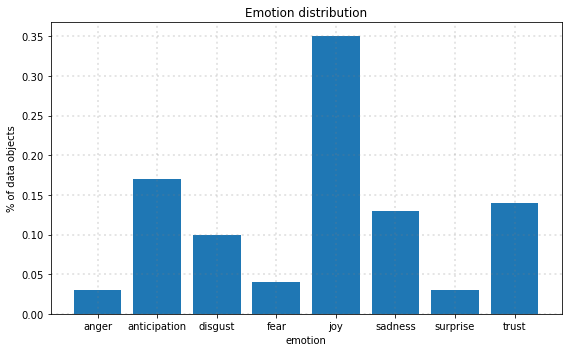

In [34]:
#plot the histogram of the TrainingData
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

emotion_percentage = []
for i in np.array(df_TrainingData.groupby(['emotion']).count().text):
    emotion_percentage.append(round(i/1455563,2))

fig = plt.figure(figsize = (8,5))
ax = fig.subplots()
ax.bar(df_TrainingData.groupby(['emotion']).count().index, emotion_percentage)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set(xticklabels = list(df_TrainingData.groupby(['emotion']).count().index),
       title = 'Emotion distribution',
       xlabel = 'emotion',
       ylabel = '% of data objects')

plt.tight_layout();

## 3.Data preprocessing

In [1]:
# load a pickle file
import pandas as pd
df_TrainingData = pd.read_pickle('pkl/df_TrainingData.pkl')
df_TestData = pd.read_pickle('pkl/df_TestData.pkl')

In [2]:
#
#replace some special text by regularize words
#EX: @ERIC ===> USER , 25 times ===> NUM times ...etc
import re

emailsRegex=re.compile(r'[\w\.-]+@[\w\.-]+')
userMentionsRegex=re.compile(r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)')
urlsRegex=re.compile('r(f|ht)(tp)(s?)(://)(.*)[.|/][^ ]+')
numsRegex=re.compile(r"\b\d+\b")

In [3]:
import time
texts = df_TrainingData['text']
start = time.time()
texts = texts.apply(lambda a:a.replace("<LH>",""))
texts = texts.apply(lambda a:userMentionsRegex.sub(' USER',a))
texts = texts.apply(lambda a:emailsRegex.sub(' EMAIL',a))
texts = texts.apply(lambda a:urlsRegex.sub(' URL',a))
texts = texts.apply(lambda a:numsRegex.sub(' NUM',a))
print("TIME: %f",time.time()-start)

TIME: %f 16.636592149734497


In [4]:
texts = list(df_TrainingData['text'])
labels = list(df_TrainingData['emotion'])

## 4.Label one-hot

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df_TrainingData['emotion'])
label_classes = label_encoder.classes_
print(label_classes)

['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']


In [6]:
from keras.utils.np_utils import to_categorical

encoded_emotion = label_encoder.transform(df_TrainingData['emotion'])
OneHotEncoded_emotion = to_categorical(encoded_emotion)
print('OneHotEncoded_emotion shape:', OneHotEncoded_emotion.shape)

Using TensorFlow backend.


OneHotEncoded_emotion shape: (1455563, 8)


## 5.Tokenize

In [7]:
from keras.preprocessing.text import Tokenizer

start = time.time()
#num_words = 10000
#tokenizer = Tokenizer(num_words=num_words, lower=True)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_TrainingData['text'])
print("Time : {:.2f} sec".format(time.time() - start))

Time : 25.04 sec


In [8]:
sequences = tokenizer.texts_to_sequences(df_TrainingData['text'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 912661 unique tokens.


In [9]:
from keras.preprocessing.sequence import pad_sequences
max_len=60 #testing data max length
data = pad_sequences(sequences, maxlen=max_len)
print('data shape:', data.shape)

data shape: (1455563, 60)


## 6.Train / Test split

I split the training validation data with the same random seed every time for comparing which method is better.

In [10]:
# I split the training validation data with the same random seed every time for finding which method is better.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data, OneHotEncoded_emotion, test_size=0.25, random_state=20191118)

## 7.Model

### 7.1Using pre-trained words embedding (glove).

In [18]:
import numpy as np

EMBEDDING_DIM = 100
 
embeddings_index = {}
f = open(r'glove.twitter.27B.100d.txt',encoding="utf-8")
print("Loading GloVe")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print("Done.\nProceeding with Embedding Matrix...")
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
print("Completed!")

Loading GloVe
Done.
Proceeding with Embedding Matrix...
Completed!


In [19]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=True)

## 7.2CNN-LSTM model

* The best of the result of my CNN-LSTM model is 0.473.
* I try to imporve it, so i make some data preprocessing like remove the stop words, special charts, @.... but the result become worse.
* I find out if i use pre-trained words embedding(glove), i don't need to do the work i mentioned above. I think the reason is due to the special type in twitter.
* I also try to use LSTM-CNN model instead, but the result is worse then CNN_LSTM model.

In [31]:
from keras import regularizers, initializers, optimizers, callbacks
from keras.models import Model,Sequential, load_model

# the best result is 0.469
sequence_input = Input(shape=(max_len,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm1 = Bidirectional(LSTM(70,dropout=0.4,recurrent_dropout=0.4,return_sequences=True))(embedded_sequences)
l_cov1= Conv1D(100, 3, activation='relu',kernel_regularizer=regularizers.l2(0.02))(l_lstm1)
l_pool1 = MaxPooling1D(2)(l_cov1)
l_drop1 = Dropout(0.4)(l_pool1)
l_flat = Flatten()(l_drop1)
l_dense = Dense(50, activation='relu')(l_flat)
preds = Dense(8, activation='softmax')(l_dense)

model = Model(sequence_input,preds)
adam= optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999,  decay=0, amsgrad=False)
#adadelta = optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)epsilon=None,
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 60)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 60, 100)           91266200  
_________________________________________________________________
bidirectional_5 (Bidirection (None, 60, 140)           95760     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 58, 100)           42100     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 29, 100)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 29, 100)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2900)              0   

In [32]:
epoch = 50
batch_size = 5000

In [38]:
train_history =model.fit(x_train, y_train, validation_data=(x_test, y_test),
                         epochs=epoch, batch_size=batch_size)


Train on 1091672 samples, validate on 363891 samples
Epoch 1/50
1091672/1091672 [==============================] - 1313s 1ms/step - loss: 3.5216 - acc: 0.3510 - val_loss: 2.8867 - val_acc: 0.3781
Epoch 2/50
1091672/1091672 [==============================] - 1300s 1ms/step - loss: 2.4891 - acc: 0.3917 - val_loss: 2.1044 - val_acc: 0.4258
Epoch 3/50
1091672/1091672 [==============================] - 1294s 1ms/step - loss: 1.9527 - acc: 0.4198 - val_loss: 1.7478 - val_acc: 0.4429
Epoch 4/50
1091672/1091672 [==============================] - 1292s 1ms/step - loss: 1.6962 - acc: 0.4350 - val_loss: 1.5777 - val_acc: 0.4536
Epoch 5/50
1091672/1091672 [==============================] - 1294s 1ms/step - loss: 1.5733 - acc: 0.4450 - val_loss: 1.4943 - val_acc: 0.4633
Epoch 6/50
1091672/1091672 [==============================] - 1293s 1ms/step - loss: 1.5107 - acc: 0.4541 - val_loss: 1.4522 - val_acc: 0.4737
Epoch 7/50
1091672/1091672 [==============================] - 1294s 1ms/step - loss: 1.47

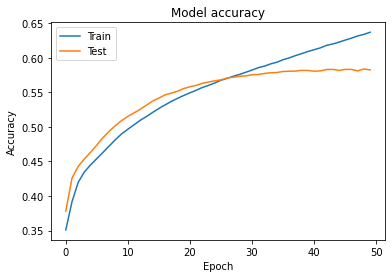

In [39]:
#Plot the Loss/Acc 
import matplotlib.pyplot as plt 
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig("acc.png")
plt.show()

## 8.Create submition csv

In [40]:
texts = list(df_TestData['text'])
test_sequences = tokenizer.texts_to_sequences(texts)
test = pad_sequences(test_sequences, maxlen=max_len)

In [55]:
predict = model.predict(test,batch_size=batch_size)
pre = np.argmax(predict, axis=1)
result = label_encoder.inverse_transform(pre)
df_result=df_TestData.drop(['identification','text'],axis=1)
df_result['emotion'] = result
#test_data.to_csv('test.csv',index=False)
df_result.to_pickle('pkl/result.pkl')

,_score,_index,_source,_crawldate,_type,tweet,hashtags,tweet_id,emotion
0,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,"{'hashtags': ['bibleverse'], 'tweet_id': '0x28...",[bibleverse],0x28b412,anticipation
1,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,"{'hashtags': [], 'tweet_id': '0x2de201', 'text...",[],0x2de201,anticipation
2,66,hashtag_tweets,"{'tweet': {'hashtags': ['materialism', 'money'...",2015-09-09 09:22:55,tweets,"{'hashtags': ['materialism', 'money', 'possess...","[materialism, money, possessions]",0x218443,joy
3,104,hashtag_tweets,"{'tweet': {'hashtags': ['GodsPlan', 'GodsWork'...",2015-10-10 14:33:26,tweets,"{'hashtags': ['GodsPlan', 'GodsWork'], 'tweet_...","[GodsPlan, GodsWork]",0x2939d5,joy
4,310,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2628...",2016-10-23 08:49:50,tweets,"{'hashtags': [], 'tweet_id': '0x26289a', 'text...",[],0x26289a,trust
...,...,...,...,...,...,...,...,...,...
411967,602,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2913...",2016-12-10 18:01:00,tweets,"{'hashtags': [], 'tweet_id': '0x2913b4', 'text...",[],0x2913b4,anticipation
411968,598,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a98...",2015-01-04 14:40:55,tweets,"{'hashtags': [], 'tweet_id': '0x2a980e', 'text...",[],0x2a980e,anticipation
411969,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,"{'hashtags': ['mixedfeeling', 'butimTHATperson...","[mixedfeeling, butimTHATperson]",0x316b80,joy
411970,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,"{'hashtags': [], 'tweet_id': '0x29d0cb', 'text...",[],0x29d0cb,joy


In [81]:
df_result = pd.read_pickle('pkl/result.pkl')
df_result

,_score,_index,_source,_crawldate,_type,tweet,hashtags,tweet_id,emotion
0,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,"{'hashtags': ['bibleverse'], 'tweet_id': '0x28...",[bibleverse],0x28b412,anticipation
1,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,"{'hashtags': [], 'tweet_id': '0x2de201', 'text...",[],0x2de201,anticipation
2,66,hashtag_tweets,"{'tweet': {'hashtags': ['materialism', 'money'...",2015-09-09 09:22:55,tweets,"{'hashtags': ['materialism', 'money', 'possess...","[materialism, money, possessions]",0x218443,joy
3,104,hashtag_tweets,"{'tweet': {'hashtags': ['GodsPlan', 'GodsWork'...",2015-10-10 14:33:26,tweets,"{'hashtags': ['GodsPlan', 'GodsWork'], 'tweet_...","[GodsPlan, GodsWork]",0x2939d5,joy
4,310,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2628...",2016-10-23 08:49:50,tweets,"{'hashtags': [], 'tweet_id': '0x26289a', 'text...",[],0x26289a,trust
...,...,...,...,...,...,...,...,...,...
411967,602,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2913...",2016-12-10 18:01:00,tweets,"{'hashtags': [], 'tweet_id': '0x2913b4', 'text...",[],0x2913b4,anticipation
411968,598,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a98...",2015-01-04 14:40:55,tweets,"{'hashtags': [], 'tweet_id': '0x2a980e', 'text...",[],0x2a980e,anticipation
411969,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,"{'hashtags': ['mixedfeeling', 'butimTHATperson...","[mixedfeeling, butimTHATperson]",0x316b80,joy
411970,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,"{'hashtags': [], 'tweet_id': '0x29d0cb', 'text...",[],0x29d0cb,joy


In [82]:
sample = pd.read_csv("sampleSubmission.csv",header=0)
sample

,id,emotion
0,0x2c7743,surprise
1,0x2c1eed,surprise
2,0x2826ea,surprise
3,0x356d9a,surprise
4,0x20fd95,surprise
...,...,...
411967,0x351857,surprise
411968,0x2c028e,surprise
411969,0x1f2430,surprise
411970,0x2be24e,surprise


In [83]:
df_result.index = df_result.tweet_id
df_result

,_score,_index,_source,_crawldate,_type,tweet,hashtags,tweet_id,emotion
tweet_id,,,,,,,,,
0x28b412,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,"{'hashtags': ['bibleverse'], 'tweet_id': '0x28...",[bibleverse],0x28b412,anticipation
0x2de201,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,"{'hashtags': [], 'tweet_id': '0x2de201', 'text...",[],0x2de201,anticipation
0x218443,66,hashtag_tweets,"{'tweet': {'hashtags': ['materialism', 'money'...",2015-09-09 09:22:55,tweets,"{'hashtags': ['materialism', 'money', 'possess...","[materialism, money, possessions]",0x218443,joy
0x2939d5,104,hashtag_tweets,"{'tweet': {'hashtags': ['GodsPlan', 'GodsWork'...",2015-10-10 14:33:26,tweets,"{'hashtags': ['GodsPlan', 'GodsWork'], 'tweet_...","[GodsPlan, GodsWork]",0x2939d5,joy
0x26289a,310,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2628...",2016-10-23 08:49:50,tweets,"{'hashtags': [], 'tweet_id': '0x26289a', 'text...",[],0x26289a,trust
...,...,...,...,...,...,...,...,...,...
0x2913b4,602,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2913...",2016-12-10 18:01:00,tweets,"{'hashtags': [], 'tweet_id': '0x2913b4', 'text...",[],0x2913b4,anticipation
0x2a980e,598,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a98...",2015-01-04 14:40:55,tweets,"{'hashtags': [], 'tweet_id': '0x2a980e', 'text...",[],0x2a980e,anticipation
0x316b80,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,"{'hashtags': ['mixedfeeling', 'butimTHATperson...","[mixedfeeling, butimTHATperson]",0x316b80,joy


In [85]:
sample.index = sample.id
sample

,id,emotion
id,,
0x2c7743,0x2c7743,surprise
0x2c1eed,0x2c1eed,surprise
0x2826ea,0x2826ea,surprise
0x356d9a,0x356d9a,surprise
0x20fd95,0x20fd95,surprise
...,...,...
0x351857,0x351857,surprise
0x2c028e,0x2c028e,surprise
0x1f2430,0x1f2430,surprise


In [88]:
sample.emotion = df_result.emotion
sample.to_csv('result.csv')